# Bitcoin price prediction
Disclaimer: Don't make your investment decisions based on this

In this project we will try to predict he price of bitcoin based on technical factors related to bitcoin.
The price of bitcoin is heavily influenced by external factors such as politics, banking, regulations by different countries etc., but this is out of scope for this project.

Now, let us load the dataset and look at the features closly

Authors: Piyush Kulkarni and 
        Madhumita Jadhav

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
btc = pd.read_csv('bitcoin_dataset.csv')
btc.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

### Data Dictionary
Date : Date of observation

btc_market_price : Average USD market price across major bitcoin exchanges.

btc_total_bitcoins : The total number of bitcoins that have already been mined. Total number of bitcoins is capped at 21 millions

btc_market_cap : The total USD value of bitcoin supply in circulation.

btc_trade_volume : The total USD value of trading volume on major bitcoin exchanges.

btc_blocks_size : The total size of all block headers and transactions.

btc_avg_block_size : The average block size in MB.

btc_n_orphaned_blocks : The total number of blocks mined but ultimately not attached to the main Bitcoin blockchain.

btc_n_transactions_per_block : The average number of transactions per block.

btc_median_confirmation_time : The median time for a transaction to be accepted into a mined block.

btc_hash_rate : The estimated number of tera hashes per second the Bitcoin network is performing.

btc_difficulty : A relative measure of how difficult it is to find a new block.

btc_miners_revenue : Total value of coinbase block rewards and transaction fees paid to miners.

btc_transaction_fees : The total value of all transaction fees paid to miners.

btc_cost_per_transaction_percent : miners revenue as percentage of the transaction volume.

btc_cost_per_transaction : miners revenue divided by the number of transactions.

btc_n_unique_addresses : The total number of unique addresses used on the Bitcoin blockchain.

btc_n_transactions : The number of daily confirmed Bitcoin transactions.

btc_n_transactions_total : Total number of transactions.

btc_n_transactions_excluding_popular : The total number of Bitcoin transactions, excluding the 100 most popular addresses.

btc_n_transactions_excluding_chains_longer_than_100 : The total number of Bitcoin transactions per day excluding long transaction chains.

btc_output_volume : The total value of all transaction outputs per day.

btc_estimated_transaction_volume : The total estimated value of transactions on the Bitcoin blockchain.


In [4]:
btc.shape

(2906, 24)

### Correlation and feature selection
Let us loook at the correlation of these variables with the price of bitcoin

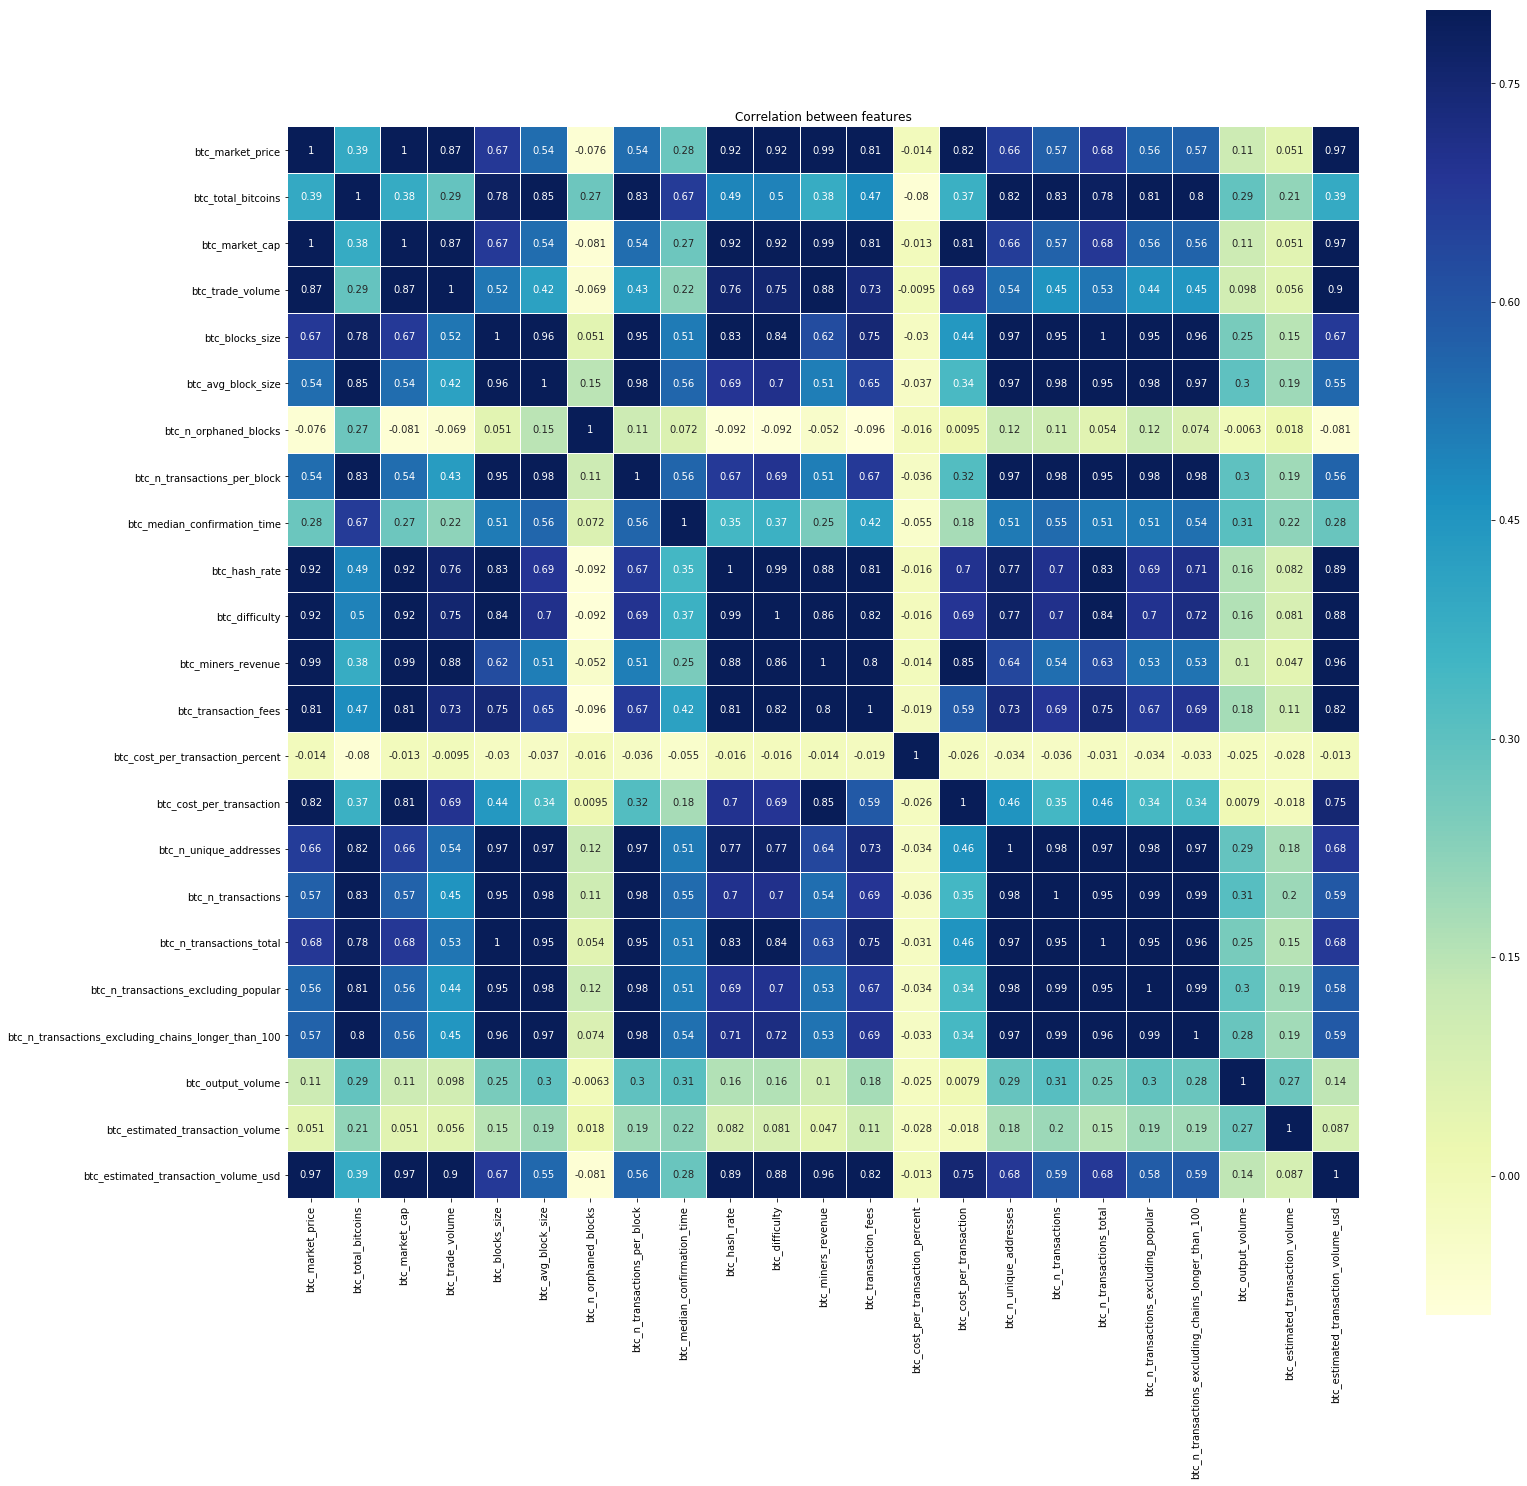

In [5]:
plt.figure(figsize = (24,24))
sns.heatmap(btc.corr(), vmax=0.8, linewidths=0.01,
            square=True, annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

### btc_market_price and btc_total_bitcoins
As we said earlier, total supply of bitcoin is capped at 21 million, though there is weak correlation now, this correlation will increase in future as bitcoins mined will get closer to 21 million.

### btc_market_price and btc_market_cap
As expected this have a perfect correlation. As price of bitcoin will change, its market cap will also change in sync. We will keep this column for now for visualization purpose and remove it at the time of model building.

### btc_market_price and btc_trade_volume
As bitcoin will gain popularity, more people will want to buy it and the trading volume will increase

### btc_blocks_size, btc_avg_block_size, btc_n_orphaned_blocks and btc_n_transactions_per_block
as we can see, there is very little correlation between bitcoin price and orphan blocks. Orphaned blocks are valid blocks which are not part of the main chain. They can occur naturally when two miners produce blocks at similar times or they can be caused by an attacker (with enough hashing power) attempting to reverse transactions. We will drop this feature.

Btc block size and btc avg block size essentially the same thing. Also, there will be no increase in block size in future because of 1MB block size imposed by Satoshi himself. When a block is mined at its full capacity this means a lot of transactions are going on which means bitcoin is gaining popularity.

We believe that though the block size is limited, the number of transactions per block will increase further in future when projects like Lightning Network will be implemented. We have seen this in past with SegWit implementation.

Because of this, we have decided to keep only btc_n_transactions_per_block

keeping only avg bloc size. Also, there will be no increase in block size in future because of 1MB block size imposed by Satoshi himself.

### btc_median_confirmation_time

median confirmation time has little correlation with the price because as more people are buying btc, number of transactions are increasing and thus the transition time is increasing. even though it has little correlation, we decide to keep it because it gives you an idea of popularity in current scenario. (when projects like Lightning Network comes in, the transaction time will decrease further)

### btc_hash_rate and btc_difficulty
Bitcoin hash rate and difficulty are highly correlated. On an average, at current pace, it takes 10 minutes to mine each block and the difficulty is set to vary every 2016 blocks as a function of how much hashing power has been deployed by the network of miners. As of now, it takes approximately 10 min to mine one block which makes difficulty change every 12 days. Thus we have decided to treat difficulty as continues instead of categorical.


### btc_miners_revenue
With current rate, 12.5 bitcoins are rewarded to miners per block which will be constant till next halving which will occur approximately on 1 June 2020 when the reward will reduce to 6.25 bitcoins per block. We are keeping this Colum just because it is highly correlated as the revenue is given in USD and not in bitcoin.

### btc_transaction_fees
This is the avg fees paid per block in BTC. Sometimes brokers pay higher amount of fees to miners to priorities their transaction and put it in next block to be mined.

### btc_cost_per_transaction_percent
We will be removing this because is just the transaction cost in percentage and has very low correlation


### btc_cost_per_transaction
This is Miner revenue divided by total transaction. We will remove this column


### btc_n_unique_addresses
As bitcoin will gain more and more popularity, first time buyers will keep on increasing which will raise the price of bitcoin further.


### btc_n_transactions, btc_n_transactions_total, btc_n_transactions_excluding_popular,  btc_n_transactions_excluding_chains_longer_than_100
We will only keep btc_n_transactions_excluding_popular as this gives us number of daily transactions excluding that from 100 popular wallets. The top 100 wallets mostly consist of gambling platforms which have no direct impact on price of bitcoin (source: blockchain.info).

We are not considering btc_n_transactions_excluding_chains_longer_than_100 because though some of the transactions in this case represent money laundering, major factor leading to long chain transactions is crypto currency exchanges where traders are constantly converting one cryptocurrency to another and most of traders prefer to convert their profits into bitcoin. 


### btc_output_volume, btc_estimated_transaction_volume and btc_estimated_transaction_volume_usd
We will remove these columns as btc_output_volume, btc_estimated_transaction_volume has very low correlation and btc_estimated_transaction_volume_usd hhaving high correlation with price is expected but we will remove this variable.


Dropping unwanted columns

In [6]:
data = btc[['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap','btc_trade_volume', 'btc_n_transactions_per_block',
            'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue', 'btc_transaction_fees', 
            'btc_n_unique_addresses', 'btc_n_transactions_excluding_popular']]

data.info()
#data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 13 columns):
Date                                    2906 non-null object
btc_market_price                        2906 non-null float64
btc_total_bitcoins                      2879 non-null float64
btc_market_cap                          2906 non-null float64
btc_trade_volume                        2885 non-null float64
btc_n_transactions_per_block            2906 non-null float64
btc_median_confirmation_time            2894 non-null float64
btc_hash_rate                           2906 non-null float64
btc_difficulty                          2890 non-null float64
btc_miners_revenue                      2906 non-null float64
btc_transaction_fees                    2896 non-null float64
btc_n_unique_addresses                  2906 non-null int64
btc_n_transactions_excluding_popular    2906 non-null int64
dtypes: float64(10), int64(2), object(1)
memory usage: 295.2+ KB


Removing the time stamps

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

data.head()

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_n_unique_addresses,btc_n_transactions_excluding_popular
0,2010-02-17,0.0,2043200.0,0.0,0.0,1.0,0.0,0.000029,2.527738,0.0,0.0,241,244
1,2010-02-18,0.0,2054650.0,0.0,0.0,1.0,0.0,0.000029,2.527738,0.0,0.0,234,235
2,2010-02-19,0.0,2063600.0,0.0,0.0,1.0,0.0,0.000023,2.527738,0.0,0.0,185,183
3,2010-02-20,0.0,2074700.0,0.0,0.0,1.0,0.0,0.000028,2.527738,0.0,0.0,224,224
4,2010-02-21,0.0,2085400.0,0.0,0.0,1.0,0.0,0.000027,2.527738,0.0,0.0,218,218


now, let us look at the correlatoions again

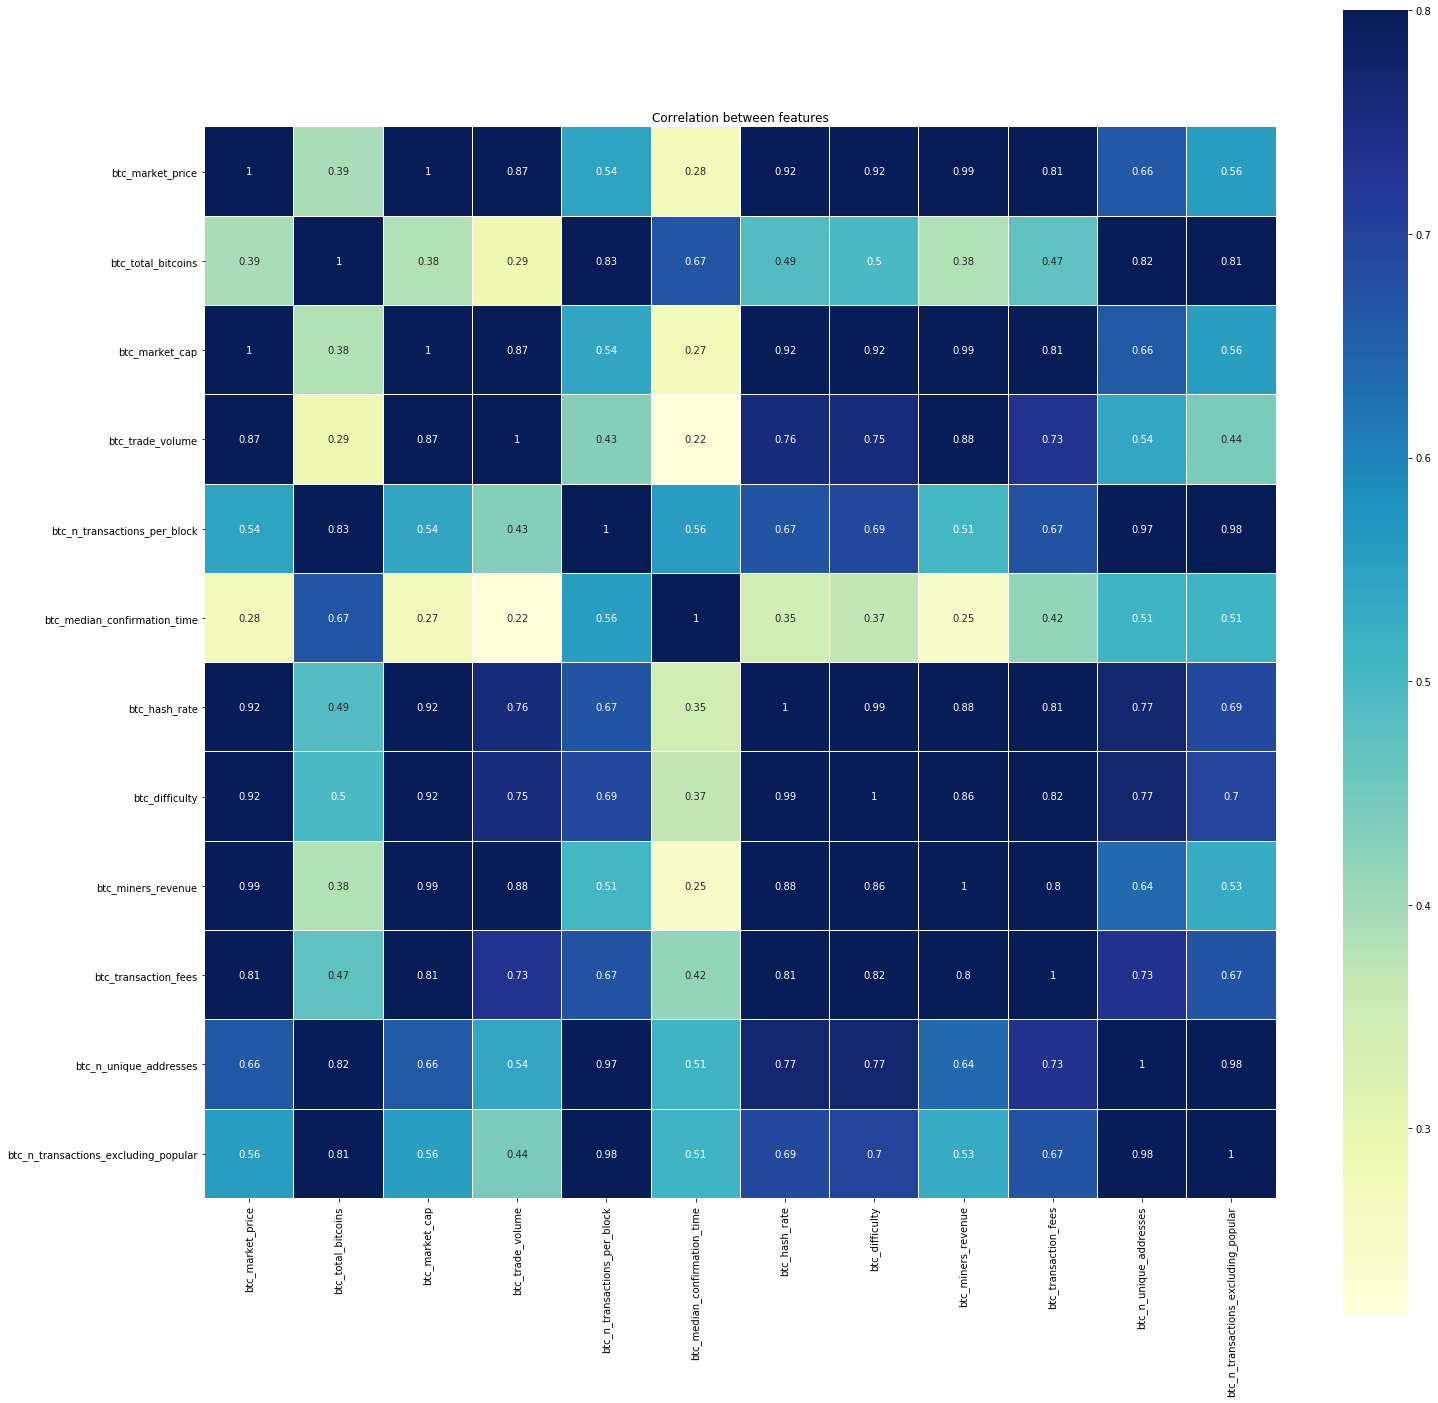

In [8]:
plt.figure(figsize = (24,24))
sns.heatmap(data.corr(), vmax=0.8, linewidths=0.01,
            square=True, annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

# Null Handling
Let us look at the null values

In [9]:
data.isnull().sum()

Date                                     0
btc_market_price                         0
btc_total_bitcoins                      27
btc_market_cap                           0
btc_trade_volume                        21
btc_n_transactions_per_block             0
btc_median_confirmation_time            12
btc_hash_rate                            0
btc_difficulty                          16
btc_miners_revenue                       0
btc_transaction_fees                    10
btc_n_unique_addresses                   0
btc_n_transactions_excluding_popular     0
dtype: int64

Let us plot the missing value columns

In [10]:
data_null = data[['Date', 'btc_total_bitcoins','btc_trade_volume',
            'btc_median_confirmation_time', 'btc_difficulty', 'btc_transaction_fees']]

In [11]:
data_null.set_index('Date', inplace = True)

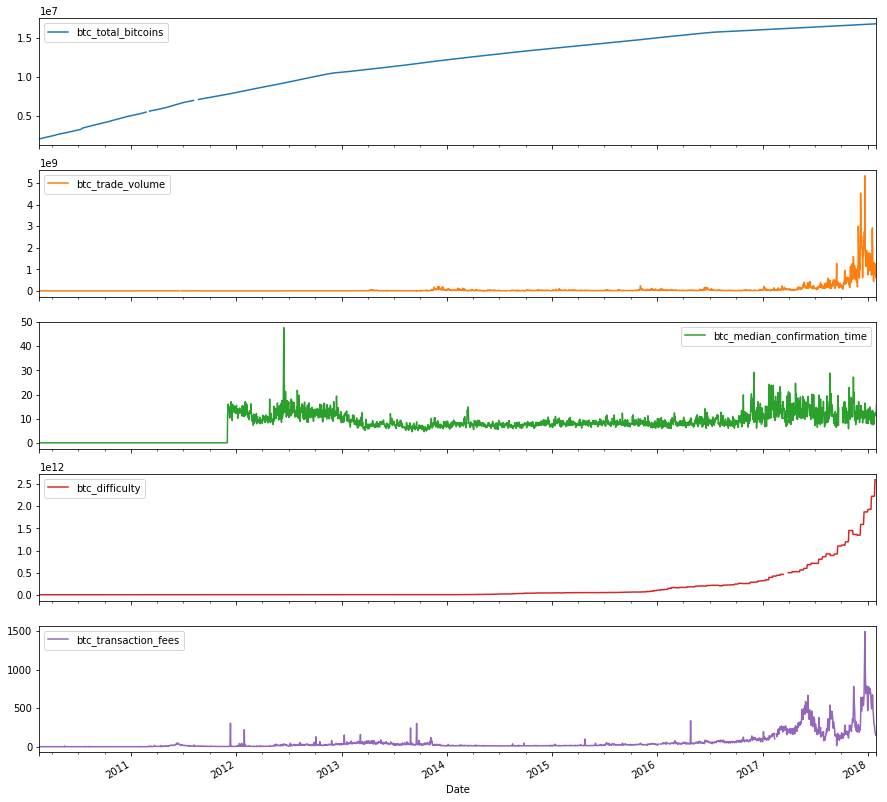

In [12]:
plt.figure();data_null.plot(subplots=True, figsize=(15,15)); plt.legend(loc='best')

Let us look at null columns

In [13]:
data[data.isnull().any(axis=1)]

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_n_unique_addresses,btc_n_transactions_excluding_popular
371,2011-02-23,0.950000,NaN,5.224192e+06,6.046983e+03,11.000000,0.000000,4.404207e-01,3.645989e+04,1.154250e+04,0.403322,3480,2394
372,2011-02-24,0.949900,NaN,5.233807e+06,1.274776e+04,12.000000,0.000000,3.878602e-01,3.645989e+04,1.016393e+04,0.157695,2847,1957
373,2011-02-25,1.000000,NaN,5.520950e+06,4.282618e+03,17.000000,0.000000,4.023596e-01,3.645989e+04,1.110000e+04,0.260972,3067,2134
374,2011-02-26,0.988567,NaN,5.470235e+06,4.459745e+03,16.000000,0.000000,4.549201e-01,3.645989e+04,1.240652e+04,0.710496,2901,1964
375,2011-02-27,0.960000,NaN,5.325168e+06,2.163994e+04,10.000000,0.000000,7.488733e-01,5.558952e+04,1.300800e+04,0.740000,3198,2261
376,2011-02-28,0.949231,NaN,5.273358e+06,4.093470e+03,7.000000,0.000000,4.614828e-01,5.558952e+04,7.926079e+03,0.537854,2706,1932
377,2011-03-01,0.970000,NaN,5.395043e+06,2.144129e+04,7.000000,0.000000,3.592381e-01,5.558952e+04,6.305000e+03,0.734554,2494,1660
378,2011-03-02,0.949800,NaN,5.290718e+06,2.522520e+03,9.000000,0.000000,4.670095e-01,5.558952e+04,8.025810e+03,0.246500,4755,2974
379,2011-03-03,0.940000,NaN,5.244730e+06,2.526936e+03,13.000000,0.000000,5.056967e-01,5.558952e+04,8.606640e+03,6.391300,4099,3002
380,2011-03-04,0.939200,NaN,5.249611e+06,2.467820e+03,11.000000,0.000000,5.499106e-01,5.558952e+04,9.345979e+03,1.398600,2996,2119


## Why forward filling
As we can see the missing values for particular column are not at random but are missing together in bunch.

we can use forward filling as we can see from the distribution of missing values.

Imputing missing values with mean or mode doesn’t seem feasible because we and to follow the trend line in the direction of the slope.



In [14]:
data=data.fillna(method='ffill')

In [15]:
data.isnull().sum()


Date                                    0
btc_market_price                        0
btc_total_bitcoins                      0
btc_market_cap                          0
btc_trade_volume                        0
btc_n_transactions_per_block            0
btc_median_confirmation_time            0
btc_hash_rate                           0
btc_difficulty                          0
btc_miners_revenue                      0
btc_transaction_fees                    0
btc_n_unique_addresses                  0
btc_n_transactions_excluding_popular    0
dtype: int64

# Data Visualizations
let us try to understand the data and see if we can find any patterns.
We will be using plotly library to make dynamic visualizations.


In [16]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout
init_notebook_mode(connected=True)

# For the below code you need to install library to visualize the graphs 
Package - Plotly and Command - !pip install plotly

In [17]:
btc_market_price = go.Scatter(
    x=data.Date,
    y=data['btc_market_price'],
    name = "Bitcoin Market Price",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

plot = [btc_market_price]

layout = dict(
    title='Price of Bitcoin',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='time'
    )
)

fig = dict(data=plot, layout=layout)
plotly.offline.iplot(fig, filename = "Bitcoin Price")

In [18]:

btc_market_price = go.Scatter(
    x=data.Date,
    y=data['btc_market_price'],
    name = "btc_market_price",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

btc_n_transactions_per_block = go.Scatter(
    x=data.Date,
    y=data['btc_n_transactions_per_block'],
    name = "btc_n_transactions_per_block",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

plot = [btc_market_price,btc_n_transactions_per_block]

layout = dict(
    title='Price of bitcoin and number of transactions per block',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='time'
    )
)

fig = dict(data=plot, layout=layout)
plotly.offline.iplot(fig, filename = "Time Series with Rangeslider")

As expected we can see that number of transactions per block are consolidating at its maximum.

In [19]:

btc_hash_rate = go.Scatter(
    x=data.Date,
    y=data['btc_hash_rate'],
    name = "btc_hash_rate",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

'''btc_difficulty = go.Scatter(
    x=data.Date,
    y=data['btc_difficulty'],
    name = "btc_difficulty",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)
'''
btc_miners_revenue = go.Scatter(
    x=data.Date,
    y=data['btc_miners_revenue'],
    name = "btc_miners_revenue",
    line = dict(color = '#8E44AD'),
    opacity = 0.8)


plot = [btc_hash_rate,btc_miners_revenue]

layout = dict(
    title='Hash rate and miner revenue',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='time'
    )
)

fig = dict(data=plot, layout=layout)
plotly.offline.iplot(fig, filename = "Time Series with Rangeslider")

In [20]:
btc_n_unique_addresses = go.Scatter(
    x=data.Date,
    y=data['btc_n_unique_addresses'],
    name = "btc_n_unique_addresses",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

'''btc_difficulty = go.Scatter(
    x=data.Date,
    y=data['btc_difficulty'],
    name = "btc_difficulty",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)
'''
btc_n_transactions_excluding_popular = go.Scatter(
    x=data.Date,
    y=data['btc_n_transactions_excluding_popular'],
    name = "btc_n_transactions_excluding_popular",
    line = dict(color = '#8E44AD'),
    opacity = 0.8)


plot = [btc_n_unique_addresses,btc_n_transactions_excluding_popular]

layout = dict(
    title='Unique wallet addresses and number of transactions',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='time'
    )
)

fig = dict(data=plot, layout=layout)
plotly.offline.iplot(fig, filename = "Time Series with Rangeslider")

As we can see from above plots and correlation matrix, all the variables are higly correlated with the price of bitcoin and all are trending with the price of bitcoin.

Let us look at the distribution of each feature

D:\Python\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8FFC3A898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C881390390>]], dtype=object)

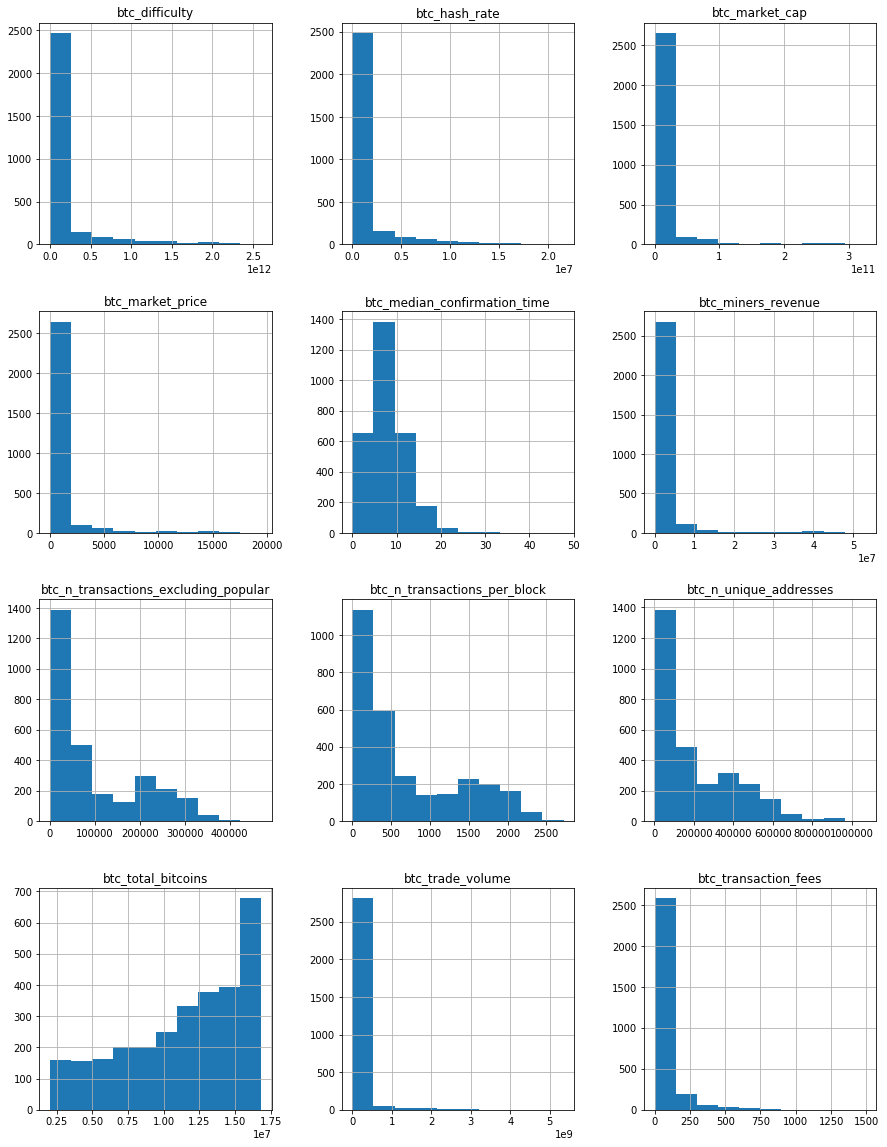

In [21]:
fig = plt.figure(figsize=(15,20))
ax=fig.gca()
data.hist(ax=ax)

In [22]:
# As we can see, we need to scale the data first

## Normalizing the data
As we see from the distribution, we need to scale the data to understand effect of each feature on price of bitcoin.
first let us split the data in training and test set and then apply normalization.

In [22]:
# First let us reset the index data colum
#data.reset_index(level=0, inplace = True)

In [21]:
X = data.drop(['btc_market_price', 'Date', 'btc_market_cap'], axis = 1) #Dropping btc_market_cap because of perfect correlation
y = data['btc_market_price']
X.head()

,btc_total_bitcoins,btc_trade_volume,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_n_unique_addresses,btc_n_transactions_excluding_popular
0,2043200.0,0.0,1.0,0.0,0.000029,2.527738,0.0,0.0,241,244
1,2054650.0,0.0,1.0,0.0,0.000029,2.527738,0.0,0.0,234,235
2,2063600.0,0.0,1.0,0.0,0.000023,2.527738,0.0,0.0,185,183
3,2074700.0,0.0,1.0,0.0,0.000028,2.527738,0.0,0.0,224,224
4,2085400.0,0.0,1.0,0.0,0.000027,2.527738,0.0,0.0,218,218


In [25]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: btc_market_price, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [23]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

# Prediction of bitcoin price using different models

## KNN Regression

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train_std, y_train)
print(knnreg.predict(X_test_std))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test_std, y_test)))

[  1.16252189e+03   6.30018000e-02   6.08823000e+00   3.41056896e+03
   8.58356000e-01   2.38776000e+02   0.00000000e+00   5.01920100e+02
   1.10323516e+02   8.14415388e+02   5.05980000e+00   2.84995800e-01
   1.29464200e+02   4.25530000e+02   2.70742000e-01   4.96867200e+00
   1.05651300e+01   7.73101600e+01   5.64493117e+02   9.73977200e+00
   1.51257628e+04   5.05344000e+00   6.21980000e+02   2.85381600e-01
   6.02187445e+02   2.40908000e+02   4.86884000e+00   5.74685825e+02
   4.96867200e+00   8.22003450e+02   5.37094000e+02   3.02414846e+03
   6.73069800e+00   2.14620000e+00   2.52814000e+02   6.25556504e+03
   2.29784000e+02   1.07235798e+02   7.82890600e+00   2.58812000e+02
   2.60399800e-01   1.06886402e+02   3.04296000e+02   8.45480000e+00
   1.72407500e+01   4.81254000e+02   9.13406200e-01   5.18182810e+02
   1.13560198e+02   2.35474000e+02   1.23757782e+02   2.47704000e+02
   7.03364000e+02   0.00000000e+00   3.99998000e-02   4.98654000e+00
   1.41623796e+02   6.24998000e-02

In [28]:
from sklearn.metrics import mean_squared_error
y_pred = knnreg.predict(X_test_std)
#RMSE
#mean_squared_error(y_test, y_pred)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

280.172967311


## Simple Linear Regression 

In [30]:
from sklearn.linear_model import LinearRegression

#X_train, X_test, y_train, y_test = train_test_split(X_train_std, y_train,random_state = 0)
linreg = LinearRegression().fit(X_train_std, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ -111.01735245    95.90325528    79.9485802     39.60420149  -767.61762459
  1378.74108327  1930.05028978  -137.66288166    -5.23876444   -58.65804607]
linear model intercept (b): 885.206
R-squared score (training): -55958881521866876387328.000
R-squared score (test): -82811772527399021838336.000


In [31]:
y_pred = linreg.predict(X_test_std)
#RMSE
#mean_squared_error(y_test, y_pred)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

242.92744365


## Ridge regression
alpha by default is 1.0

In [32]:
from sklearn.linear_model import Ridge
#X_train, X_test, y_train, y_test = train_test_split(X_train_std, y_train,random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train_std, y_train)

print('Ridge Regression')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_std, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_std, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Ridge Regression
ridge regression linear model intercept: 885.2059201226892
ridge regression linear model coeff:
[  -84.17207046   174.1969276    159.61164262    28.11578663   -90.99120485
   765.23605069  1731.07752791   -65.49875196    25.11141422  -199.96692847]
R-squared score (training): 0.994
R-squared score (test): 0.973
Number of non-zero features: 10


In [33]:
y_pred = linridge.predict(X_test_std)
#RMSE
#mean_squared_error(y_test, y_pred)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

288.719111659


## # Ridge regression with feature normalization

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
#X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,random_state = 0)

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=1.0).fit(X_train_std, y_train)

print('Ridge Regression')   
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_std, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_std, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Ridge Regression
ridge regression linear model intercept: 885.2059201226892
ridge regression linear model coeff:
[ -109.72306443   101.54960691    99.2306872     38.68278837  -689.25077385
  1304.96331537  1914.75155286  -131.61296721    -1.91747389   -82.60969498]
R-squared score (training): 0.996
R-squared score (test): 0.980
Number of non-zero features: 10


In [35]:
y_pred = linridge.predict(X_test_std)
#RMSE
#mean_squared_error(y_test, y_pred)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

245.966891762


## Ridge regression with regularization parameter: alpha

In [36]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_std, y_train)
    r2_train = linridge.score(X_train_std, y_train)
    r2_test = linridge.score(X_test_std, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
    y_pred = linridge.predict(X_test_std)
    print('RMSE')
    print( np.sqrt(mean_squared_error(y_test, y_pred)))
    print('\n')

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 10, r-squared training: 1.00, r-squared test: 0.98
RMSE
242.92744365


Alpha = 1.00
num abs(coeff) > 1.0: 10, r-squared training: 1.00, r-squared test: 0.98
RMSE
245.966891762


Alpha = 10.00
num abs(coeff) > 1.0: 10, r-squared training: 1.00, r-squared test: 0.98
RMSE
269.721020889


Alpha = 20.00
num abs(coeff) > 1.0: 10, r-squared training: 0.99, r-squared test: 0.97
RMSE
288.719111659


Alpha = 50.00
num abs(coeff) > 1.0: 10, r-squared training: 0.99, r-squared test: 0.97
RMSE
325.596264295


Alpha = 100.00
num abs(coeff) > 1.0: 10, r-squared training: 0.99, r-squared test: 0.96
RMSE
361.005105888


Alpha = 1000.00
num abs(coeff) > 1.0: 10, r-squared training: 0.96, r-squared test: 0.94
RMSE
412.226213192




## Lasso regression
alpha by default is 0

In [37]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,random_state = 0)

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_std, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_std, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_std, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train_std), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 885.2059201226892
lasso regression linear model coeff:
[  -91.47263364   108.57196156    55.31920151    33.23378521  -502.69747141
  1132.48037717  1873.96717157  -103.67405786    -0.           -61.11194645]
Non-zero features: 9
R-squared score (training): 0.995
R-squared score (test): 0.979

Features with non-zero weight (sorted by absolute magnitude):
	[-0.1228426  -0.22428552 -0.44093574  0.00700346 -0.43342246 -0.4441774
 -0.29748014 -0.07982357 -0.54055251 -0.57523296], 1873.967
	[-1.80773314 -0.26430952 -0.97541386 -1.507341   -0.43344089 -0.44419762
 -0.38617649 -0.52576823 -0.92760499 -0.90893581], 1132.480
	[ 0.48105411 -0.21719207 -0.06981018 -0.05956113 -0.3272357  -0.33801625
 -0.14533786 -0.42768354 -0.14364672 -0.22808602], -502.697
	[ 0.81914068 -0.00191777  0.92033562  0.07689628 -0.20254782 -0.23578092
 -0.05474184 -0.19016819  0.89821917  1.07922784], 108.572
	[ 1.11883934  0.08688956  2.02126005  1.24177664  0.65788692  0.7704

In [38]:
y_pred = linlasso.predict(X_test_std)
#RMSE
#mean_squared_error(y_test, y_pred)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

254.932805433


## Lasso regression with regularization parameter: alpha

In [39]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_std, y_train)
    r2_train = linlasso.score(X_train_std, y_train)
    r2_test = linlasso.score(X_test_std, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))
    y_pred = linlasso.predict(X_test_std)
    print('RMSE: ')
    print(np.sqrt(mean_squared_error(y_test, y_pred)))
    print('\n')

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 9, r-squared training: 1.00, r-squared test: 0.98
RMSE: 
245.537795849


Alpha = 1.00
Features kept: 9, r-squared training: 1.00, r-squared test: 0.98
RMSE: 
248.431651238


Alpha = 2.00
Features kept: 9, r-squared training: 1.00, r-squared test: 0.98
RMSE: 
254.932805433


Alpha = 3.00
Features kept: 9, r-squared training: 1.00, r-squared test: 0.98
RMSE: 
262.37079443


Alpha = 5.00
Features kept: 9, r-squared training: 0.99, r-squared test: 0.97
RMSE: 
279.796848247


Alpha = 10.00
Features kept: 7, r-squared training: 0.99, r-squared test: 0.97
RMSE: 
293.246107035


Alpha = 20.00
Features kept: 5, r-squared training: 0.99, r-squared test: 0.97
RMSE: 
290.347073822


Alpha = 50.00
Features kept: 3, r-squared training: 0.99, r-squared test: 0.97
RMSE: 
279.886059225




## Polynomial regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

#X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_traind2, X_testd2, y_traind2, y_testd2 = train_test_split(X_F1_poly, y,random_state = 0)
linregd2 = LinearRegression().fit(X_traind2, y_traind2)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_traind2, y_traind2)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_testd2, y_testd2)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

#X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,random_state = 0)
linregridged2 = Ridge().fit(X_traind2, y_traind2)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_traind2, y_traind2)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_testd2, y_testd2)))

linear model coeff (w): [ -2.65447501e-05   3.31973729e-07   1.16912271e-01   7.93087036e+00
  -2.53992176e-04   3.60181364e-09   3.26116848e-04  -1.16355327e+00
  -2.37056648e-05  -5.68079943e-04]
linear model intercept (b): 132.511
R-squared score (training): 0.996
R-squared score (test): 0.981

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ -2.65447501e-05   3.31973729e-07   1.16912271e-01   7.93087036e+00
  -2.53992176e-04   3.60181364e-09   3.26116848e-04  -1.16355327e+00
  -2.37056648e-05  -5.68079943e-04]
(poly deg 2) linear model intercept (b): 132.511


ValueError: shapes (2179,66) and (10,) not aligned: 66 (dim 1) != 10 (dim 0)

## SVM for Regression 

In [26]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear', epsilon = 1000)
svr.fit(X_train_std, y_train)
svr.score(X_test_std, y_test)

0.76899950448202103

# Grid Search()

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


grid_search = GridSearchCV(SVR(kernel='linear',epsilon=1000), param_grid, cv=5)

grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1000, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(svr, param_grid = grid_values)
grid_clf_acc.fit(X_train_std, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test_std) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train_std, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test_std) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

AttributeError: 'SVR' object has no attribute 'decision_function'

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#X, y = dataset.data, dataset.target == 1
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train_std, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test_std) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train_std, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test_std) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

ValueError: Unknown label type: 'continuous'

In [29]:
y_pred = svr.predict(X_test_std)
#RMSE
#mean_squared_error(y_test, y_pred)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

843.30190058


# Cross Validation

In [47]:
final_test=pd.read_csv("test_set.csv")
final_test.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


In [48]:
data1 = final_test[['Date', 'btc_total_bitcoins', 'btc_market_cap','btc_trade_volume', 'btc_n_transactions_per_block',
            'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue', 'btc_transaction_fees', 
            'btc_n_unique_addresses', 'btc_n_transactions_excluding_popular']]

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 12 columns):
Date                                    14 non-null object
btc_total_bitcoins                      14 non-null float64
btc_market_cap                          14 non-null float64
btc_trade_volume                        14 non-null float64
btc_n_transactions_per_block            14 non-null float64
btc_median_confirmation_time            14 non-null float64
btc_hash_rate                           14 non-null float64
btc_difficulty                          14 non-null float64
btc_miners_revenue                      14 non-null float64
btc_transaction_fees                    14 non-null float64
btc_n_unique_addresses                  14 non-null int64
btc_n_transactions_excluding_popular    14 non-null int64
dtypes: float64(9), int64(2), object(1)
memory usage: 1.4+ KB


In [49]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1.head()

X1 = data1.drop(['Date', 'btc_market_cap'], axis = 1)
#y = data['btc_market_price']
X1.head()

C:\Users\mituj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,btc_total_bitcoins,btc_trade_volume,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_n_unique_addresses,btc_n_transactions_excluding_popular
0,16839687.5,1.509688e+09,1610.400000,12.475000,20703947.91,2.603080e+12,19329173.73,214.027545,591550,249466
1,16841787.5,2.213437e+09,1404.273810,11.225000,21739145.31,2.603080e+12,20349747.21,274.362582,551198,229894
2,16843762.5,9.524038e+08,1233.487342,10.475000,20445148.56,2.603080e+12,18561807.19,146.927769,436196,184856
3,16845987.5,1.080683e+09,975.769663,9.275000,23033142.05,2.603080e+12,19061071.07,111.316698,396694,165753
4,16848300.0,1.793319e+09,1169.529730,6.133333,23938939.78,2.603080e+12,16457612.31,173.767502,486553,208757


## Normalizing the test set using training data

In [50]:
std_scale = preprocessing.StandardScaler().fit(X_train)
test_std = std_scale.transform(X1)

## Prediction using Ridge Model

In [51]:
y_predict_ridge = linridge.predict(test_std)
y_predict_ridge

array([ 11048.99255076,  12584.9061518 ,   9844.67725268,  10405.80143512,
        11534.0177318 ,  13780.16358604,  10770.29707625,   9789.85655763,
         9617.80956145,   9546.56989427,   9539.55806501,  10240.39857436,
         9046.78108608,  10933.98618787])

## Prediction Using Lasso

In [126]:
y_predict_lasso = linlasso.predict(test_std)
y_predict_lasso

array([ 10098.15360273,  10699.58065707,   9634.01996858,   9836.71984434,
         9365.09585662,  10084.62353272,   9204.28301621,   8771.77120508,
         8936.91544829,   9002.3827149 ,   9151.80141003,   9931.40203356,
         9457.84287072,  10723.40783263])

## Prediction Using Simple Linear Regression

In [52]:
y_predict_linear = linreg.predict(test_std)
y_predict_linear

array([ 138.62932382,  136.02577649,  136.07157046,  134.48554805,
        128.93867185,  131.12912328,  133.80860145,  141.7219398 ,
        139.38777656,  135.03270098,  132.2220297 ,  136.37907145,
        137.73360598,  136.47508932])

# Model Selection
As we can see, Ridge regression with alpha = 0 has the minimum RMSE. 

In [53]:
from sklearn.linear_model import Ridge
#X_train, X_test, y_train, y_test = train_test_split(X_train_std, y_train,random_state = 0)

linridge = Ridge(alpha=0).fit(X_train_std, y_train)

print('Ridge Regression')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_std, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_std, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('RMSE')
y_pred = linridge.predict(X_test_std)
#RMSE
#mean_squared_error(y_test, y_pred)
print(np.sqrt(mean_squared_error(y_test, y_pred)))


Ridge Regression
ridge regression linear model intercept: 885.2059201226892
ridge regression linear model coeff:
[ -111.01735245    95.90325528    79.9485802     39.60420149  -767.61762459
  1378.74108327  1930.05028978  -137.66288166    -5.23876444   -58.65804607]
R-squared score (training): 0.996
R-squared score (test): 0.981
Number of non-zero features: 10
RMSE
242.92744365


We will use this model for predicting the final values for test data

In [54]:
y_predict_linridgezerpalpha = linridge.predict(test_std)
y_predict_linridgezerpalpha

array([ 10495.11717968,  10702.04898908,  10186.30292721,   9739.10077113,
         8790.11334074,   9356.0723623 ,  10280.26064495,  10299.97507481,
        10348.57521858,  10120.77230276,  10008.96807044,  10312.9299075 ,
         9963.69347381,  10692.06036266])

As we said in the beginning, value of bitcoin is heavily dependent on external factors such as government regulations, hacking of exchanges, FOMO, FUD created by false news etc., it is very difficult to predict the price in near future.

But, in long term blockchain technology and peer to peer transfer of money has a bright future. Lot of companies and even some banks are experimenting with blockchain. 

So,
### Keep calm and HODL!
